In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [38]:
conn=sqlite3.connect('sakila-schema')



df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

In [4]:
import os
os.getcwd()

'C:\\Users\\USER'

In [5]:
conn=sqlite3.connect('sakila-schema')

In [39]:
df=pd.read_sql('''select * from INFORMATION_SCHEMA ''',conn)

In [5]:
df=pd.read_csv('sale1.txt')

In [6]:
df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

<AxesSubplot:>

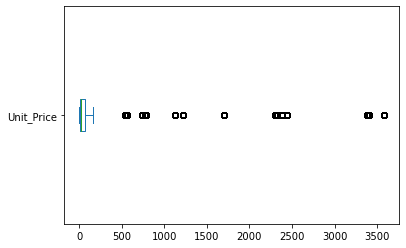

In [11]:
df.Unit_Price.plot(kind='box',vert=False)

<AxesSubplot:ylabel='Density'>

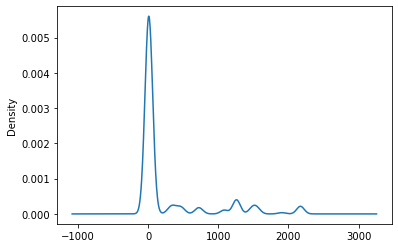

In [7]:
df['Unit_Cost'].plot(kind='density')

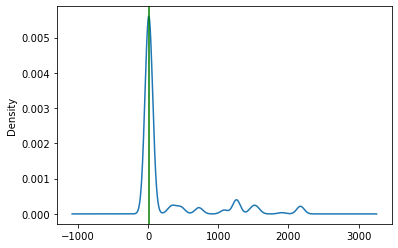

In [8]:
ax=df['Unit_Cost'].plot(kind='density')
ax.axvline(df['Unit_Cost'].median(),color='green')

In [20]:
x=np.linspace(0,12,500)

In [12]:
x

array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. ])

In [15]:
y=np.random.randn(30,3)

In [16]:
y

array([[ 0.64248785, -0.98386449,  1.67268481],
       [ 1.63697587,  1.81153187, -1.29267803],
       [-0.87077407, -0.1093647 , -0.6375365 ],
       [ 0.07869898, -0.35232665,  0.73293818],
       [ 0.12944336,  0.80901974, -0.08584293],
       [ 1.93154298, -0.54040256, -0.30089046],
       [ 0.18056603,  1.00924206,  1.90552193],
       [-2.23220711,  2.26023653, -1.52443367],
       [-0.51261739, -0.14178597, -0.07668609],
       [-0.14101689, -0.16606402,  0.20467313],
       [-0.970303  , -2.02916664, -0.28134186],
       [ 1.36456662, -0.74558833,  0.17666345],
       [ 0.41147496, -2.058202  , -0.04821895],
       [ 0.27659119, -0.02380647, -0.61180289],
       [ 1.12591603, -1.48008961,  0.12319717],
       [-0.26648744,  0.86262502, -0.60560405],
       [ 0.99158797,  0.45808434,  1.43224573],
       [ 1.25526203, -0.83277129,  0.63777511],
       [-0.54327028, -1.438914  ,  0.10163628],
       [ 1.27888748, -0.51064075, -1.41677723],
       [-1.72005361, -0.17395729, -0.483

In [21]:
y=np.cumsum(x)

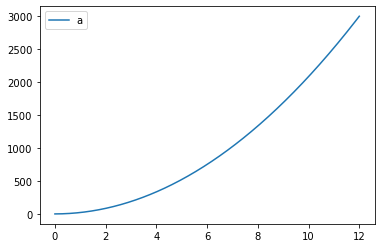

In [23]:
plt.plot(x,y)
plt.legend('abcd')

# data from api

In [25]:
import requests

In [26]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [27]:
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [28]:
lw=(pd.Timestamp.now())

In [29]:
lw

Timestamp('2022-05-25 07:46:26.990424')

In [31]:
pd.offsets.Day(7)

<7 * Days>

In [34]:
last_week=lw-pd.offsets.Day(7)

In [35]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [36]:
btc

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-05-18 08:00:00,29718.26,29888.51,29664.08,29884.02,90.637603,2.699604e+06
2022-05-18 09:00:00,29889.28,29917.90,29715.98,29838.79,59.087625,1.762081e+06
2022-05-18 10:00:00,29854.83,29989.07,29731.98,29911.87,52.563621,1.569325e+06
2022-05-18 11:00:00,29924.64,30014.95,29868.43,29932.54,53.157797,1.592392e+06
2022-05-18 12:00:00,29928.34,29946.33,29723.88,29803.52,26.811997,7.991117e+05
...,...,...,...,...,...,...
2022-05-24 23:00:00,29578.04,29604.12,29500.00,29587.98,14.930945,4.413718e+05
2022-05-25 00:00:00,29587.81,29810.38,29557.98,29632.15,134.135202,3.979407e+06
2022-05-25 01:00:00,29626.53,29662.42,29522.57,29600.38,21.158280,6.256243e+05


<AxesSubplot:xlabel='CloseTime'>

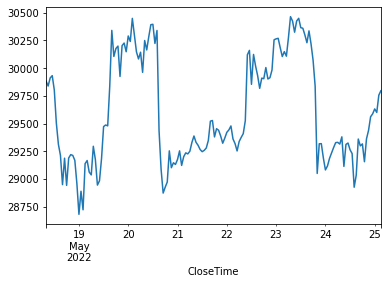

In [37]:
btc['ClosePrice'].plot()

In [38]:
btc.to_excel('cryto.xlsx', sheet_name='Bitcoin')

In [39]:
import sys
import numpy as np

In [42]:
a=np.array([1, 2, 3, 4])

In [43]:
a[0], a[1]

(1, 2)

In [44]:
a[3:]

array([4])

In [45]:
a[-2:]

array([3, 4])

In [48]:
b=np.array([2.1,2])

In [49]:
b.dtype

dtype('float64')

In [50]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

In [51]:
A.ndim

2

In [52]:
C = np.array([
    [
        [12, 11, 10],
        [9, 8, 7],
    ],
    [
        [6, 5, 4]
    ]
])

C:\Users\USER\AppData\Local\Temp\ipykernel_12416\548599459.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  C = np.array([


In [53]:
C

array([list([[12, 11, 10], [9, 8, 7]]), list([[6, 5, 4]])], dtype=object)

In [54]:
A = np.array([

    [1, 2, 3], 
    [4, 5, 6], 
    [7, 8, 9]  
])

In [55]:
A[2][1]

8

In [56]:
A[:, :2]

array([[1, 2],
       [4, 5],
       [7, 8]])

In [57]:
A[2][1]=1000

In [58]:
A

array([[   1,    2,    3],
       [   4,    5,    6],
       [   7, 1000,    9]])

In [59]:
A.sum()

1037

In [60]:
A.sum(axis=1)

array([   6,   15, 1016])

In [61]:
A +10

array([[  11,   12,   13],
       [  14,   15,   16],
       [  17, 1010,   19]])

In [62]:
a = np.arange(4)

In [63]:
a>1

array([False, False,  True,  True])

In [64]:
a[(a == 0) | (a == 1)]

array([0, 1])

In [65]:
B = np.array([
    [6, 5],
    [4, 3],
    [2, 1]
])

In [67]:
A.dot(B)

array([[  20,   14],
       [  56,   41],
       [4060, 3044]])

In [68]:
B.T

array([[6, 4, 2],
       [5, 3, 1]])

In [69]:
np.random.random(size=2)

array([0.33960796, 0.64178697])

In [70]:
np.random.rand(2, 4)

array([[0.17863044, 0.25199928, 0.33345303, 0.05440047],
       [0.5785686 , 0.40224786, 0.30713219, 0.01996609]])

In [71]:
np.arange(5, 10)

array([5, 6, 7, 8, 9])

In [72]:
np.arange(0, 1, .1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [73]:
# pandas
g7_pop = pd.Series([35.467, 63.951, 80.940, 60.665, 127.061, 64.511, 318.523])

In [74]:
g7_pop

0     35.467
1     63.951
2     80.940
3     60.665
4    127.061
5     64.511
6    318.523
dtype: float64

In [75]:
g7_pop[3]

60.665

In [76]:
g7_pop.index

RangeIndex(start=0, stop=7, step=1)

In [77]:
g7_pop.index = [
    'Canada',
    'France',
    'Germany',
    'Italy',
    'Japan',
    'United Kingdom',
    'United States',
]

In [78]:
g7_pop.index

Index(['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States'],
      dtype='object')

In [79]:
g7_pop['Japan']

127.061

In [80]:
g7_pop.iloc[-1]

318.523

In [81]:
g7_pop[(g7_pop > g7_pop.mean() - g7_pop.std() / 2) | (g7_pop > g7_pop.mean() + g7_pop.std() / 2)]

France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
dtype: float64

In [82]:
g7_pop.mean()

107.30257142857144

In [84]:
g7_pop[0]=2.0

In [85]:
g7_pop

Canada              2.000
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
dtype: float64

In [86]:
# data Frame
df = pd.DataFrame({
    'Population': [35.467, 63.951, 80.94 , 60.665, 127.061, 64.511, 318.523],
    'GDP': [
        1785387,
        2833687,
        3874437,
        2167744,
        4602367,
        2950039,
        17348075
    ],
    'Surface Area': [
        9984670,
        640679,
        357114,
        301336,
        377930,
        242495,
        9525067
    ],
    'HDI': [
        0.913,
        0.888,
        0.916,
        0.873,
        0.891,
        0.907,
        0.915
    ],
    'Continent': [
        'America',
        'Europe',
        'Europe',
        'Europe',
        'Asia',
        'Europe',
        'America'
    ]
}, columns=['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'])

In [87]:
df

,Population,GDP,Surface Area,HDI,Continent
0,35.467,1785387,9984670,0.913,America
1,63.951,2833687,640679,0.888,Europe
2,80.940,3874437,357114,0.916,Europe
3,60.665,2167744,301336,0.873,Europe
4,127.061,4602367,377930,0.891,Asia
5,64.511,2950039,242495,0.907,Europe
6,318.523,17348075,9525067,0.915,America


In [88]:
df.index = [
    'Canada',
    'France',
    'Germany',
    'Italy',
    'Japan',
    'United Kingdom',
    'United States',
]

In [89]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [91]:
df.dtypes

Population      float64
GDP               int64
Surface Area      int64
HDI             float64
Continent        object
dtype: object

In [93]:
df.Continent.value_counts()

Europe     4
America    2
Asia       1
Name: Continent, dtype: int64

In [94]:
df.loc['Canada']

Population       35.467
GDP             1785387
Surface Area    9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

In [95]:
df.iloc[3]

Population       60.665
GDP             2167744
Surface Area     301336
HDI               0.873
Continent        Europe
Name: Italy, dtype: object

In [96]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [97]:
df['Population'].to_frame()

,Population
Canada,35.467
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,318.523


In [98]:
df[1:3]

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe


In [100]:
df.loc['France': 'Italy', ['Population', 'GDP']]

,Population,GDP
France,63.951,2833687
Germany,80.940,3874437
Italy,60.665,2167744


In [101]:
df.iloc[[2,3]]

,Population,GDP,Surface Area,HDI,Continent
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe


In [102]:
df.iloc[2:,3]

Germany           0.916
Italy             0.873
Japan             0.891
United Kingdom    0.907
United States     0.915
Name: HDI, dtype: float64

In [103]:
df.iloc[1:,2:4]

,Surface Area,HDI
France,640679,0.888
Germany,357114,0.916
Italy,301336,0.873
Japan,377930,0.891
United Kingdom,242495,0.907
United States,9525067,0.915


In [104]:
df.loc[df['Population'] > 70, 'Population']

Germany           80.940
Japan            127.061
United States    318.523
Name: Population, dtype: float64

In [105]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [106]:
df.loc[df['Population'] > 70, 'HDI']

Germany          0.916
Japan            0.891
United States    0.915
Name: HDI, dtype: float64

In [107]:
df.drop('Canada')

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [108]:
df.drop('HDI',axis=1)

,Population,GDP,Surface Area,Continent
Canada,35.467,1785387,9984670,America
France,63.951,2833687,640679,Europe
Germany,80.940,3874437,357114,Europe
Italy,60.665,2167744,301336,Europe
Japan,127.061,4602367,377930,Asia
United Kingdom,64.511,2950039,242495,Europe
United States,318.523,17348075,9525067,America


In [109]:

langs = pd.Series(
    ['French', 'German', 'Italian'],
    index=['France', 'Germany', 'Italy'],
    name='Language'
)

In [110]:
langs

France      French
Germany     German
Italy      Italian
Name: Language, dtype: object

In [111]:
df['Language']=pd.Series(
    ['French', 'German', 'Italian'],
    index=['France', 'Germany', 'Italy'])

In [112]:
df

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,NaN
France,63.951,2833687,640679,0.888,Europe,French
Germany,80.940,3874437,357114,0.916,Europe,German
Italy,60.665,2167744,301336,0.873,Europe,Italian
Japan,127.061,4602367,377930,0.891,Asia,NaN
United Kingdom,64.511,2950039,242495,0.907,Europe,NaN
United States,318.523,17348075,9525067,0.915,America,NaN


In [115]:
df.rename(
    columns={
        'HDI': 'Human Development Index',
        'Anual Popcorn Consumption': 'APC'
    })

,Population,GDP,Surface Area,Human Development Index,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,NaN
France,63.951,2833687,640679,0.888,Europe,French
Germany,80.940,3874437,357114,0.916,Europe,German
Italy,60.665,2167744,301336,0.873,Europe,Italian
Japan,127.061,4602367,377930,0.891,Asia,NaN
United Kingdom,64.511,2950039,242495,0.907,Europe,NaN
United States,318.523,17348075,9525067,0.915,America,NaN


In [116]:
df.append(pd.Series({
    'Population': 3,
    'GDP': 5
}, name='China'))

C:\Users\USER\AppData\Local\Temp\ipykernel_12416\3422332996.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(pd.Series({


,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387,9984670.0,0.913,America,NaN
France,63.951,2833687,640679.0,0.888,Europe,French
Germany,80.940,3874437,357114.0,0.916,Europe,German
Italy,60.665,2167744,301336.0,0.873,Europe,Italian
Japan,127.061,4602367,377930.0,0.891,Asia,NaN
United Kingdom,64.511,2950039,242495.0,0.907,Europe,NaN
United States,318.523,17348075,9525067.0,0.915,America,NaN
China,3.000,5,NaN,NaN,NaN,NaN


In [117]:
df.loc['China'] = pd.Series({'Population': 1_400_000_000, 'Continent': 'Asia'})

In [118]:
df

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,3.546700e+01,1785387.0,9984670.0,0.913,America,NaN
France,6.395100e+01,2833687.0,640679.0,0.888,Europe,French
Germany,8.094000e+01,3874437.0,357114.0,0.916,Europe,German
Italy,6.066500e+01,2167744.0,301336.0,0.873,Europe,Italian
Japan,1.270610e+02,4602367.0,377930.0,0.891,Asia,NaN
United Kingdom,6.451100e+01,2950039.0,242495.0,0.907,Europe,NaN
United States,3.185230e+02,17348075.0,9525067.0,0.915,America,NaN
China,1.400000e+09,NaN,NaN,NaN,Asia,NaN


In [123]:
df.loc['China']['Population']=1

C:\Users\USER\AppData\Local\Temp\ipykernel_12416\3557972186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc['China']['Population']=1


In [126]:
df.loc['Germany']=pd.Series({'GDP':12})

In [127]:
df

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,3.546700e+01,1785387.0,9984670.0,0.913,America,NaN
France,6.395100e+01,2833687.0,640679.0,0.888,Europe,French
Germany,NaN,12.0,NaN,NaN,NaN,NaN
Italy,6.066500e+01,2167744.0,301336.0,0.873,Europe,Italian
Japan,1.270610e+02,4602367.0,377930.0,0.891,Asia,NaN
United Kingdom,6.451100e+01,2950039.0,242495.0,0.907,Europe,NaN
United States,3.185230e+02,17348075.0,9525067.0,0.915,America,NaN
China,1.400000e+09,NaN,NaN,NaN,Asia,NaN


In [128]:
df.reset_index()

,index,Population,GDP,Surface Area,HDI,Continent,Language
0,Canada,3.546700e+01,1785387.0,9984670.0,0.913,America,NaN
1,France,6.395100e+01,2833687.0,640679.0,0.888,Europe,French
2,Germany,NaN,12.0,NaN,NaN,NaN,NaN
3,Italy,6.066500e+01,2167744.0,301336.0,0.873,Europe,Italian
4,Japan,1.270610e+02,4602367.0,377930.0,0.891,Asia,NaN
5,United Kingdom,6.451100e+01,2950039.0,242495.0,0.907,Europe,NaN
6,United States,3.185230e+02,17348075.0,9525067.0,0.915,America,NaN
7,China,1.400000e+09,NaN,NaN,NaN,Asia,NaN


In [130]:
df.columns

Index(['Population', 'GDP', 'Surface Area', 'HDI', 'Continent', 'Language'], dtype='object')

In [131]:
population = df['Population']

In [132]:
population.mean()

200000095.7397143

In [133]:
population.sum()

1400000670.178

In [134]:
population.quantile(.25)

62.308

In [138]:
df = pd.read_csv('data.txt',header=None)

In [139]:
df

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937
...,...,...
360,2018-03-28 00:00:00,7960.380000
361,2018-03-29 00:00:00,7172.280000
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000


In [140]:
df.columns=['Timestamp', 'Price']

In [141]:
df

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937
...,...,...
360,2018-03-28 00:00:00,7960.380000
361,2018-03-29 00:00:00,7172.280000
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000


In [144]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])

In [145]:
df.set_index('Timestamp', inplace=True)

In [146]:
df

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937
...,...
2018-03-28,7960.380000
2018-03-29,7172.280000
2018-03-30,6882.531667


In [148]:
# df = pd.read_csv(
#     'data/btc-market-price.csv',
#     header=None,
#     names=['Timestamp', 'Price'],
#     index_col=0,
#     parse_dates=True
# )

In [149]:
df

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937
...,...
2018-03-28,7960.380000
2018-03-29,7172.280000
2018-03-30,6882.531667


<AxesSubplot:xlabel='Timestamp'>

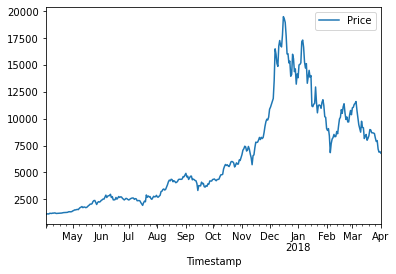

In [150]:
df.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


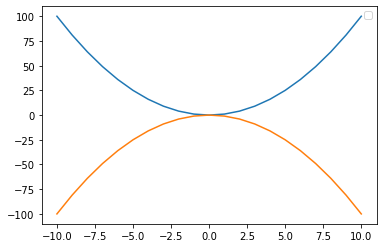

In [152]:
x=np.arange(-10,11)
plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))
plt.legend()

In [153]:
df1=pd.read_csv('data1.txt',parse_dates=True )

In [154]:
df1

,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23
...,...,...,...
357,3/28/2018,1522195200,445.93
358,3/29/2018,1522281600,383.90
359,3/30/2018,1522368000,393.82
360,3/31/2018,1522454400,394.07


<AxesSubplot:>

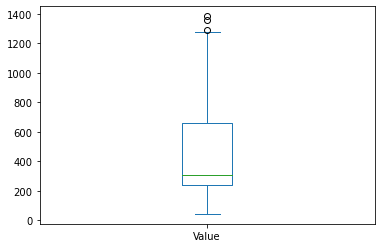

In [155]:
df1.Value.plot(kind='box')

<AxesSubplot:>

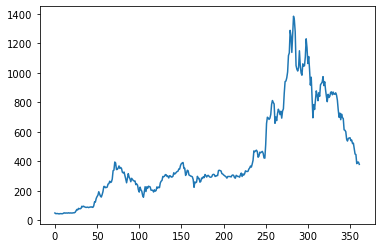

In [156]:
df1.Value.plot()

# data cleaning

In [157]:
pd.isnull(pd.DataFrame({
    'Column A': [1, np.nan, 7],
    'Column B': [np.nan, 2, 3],
    'Column C': [np.nan, 2, np.nan]
}))

,Column A,Column B,Column C
0,False,True,True
1,True,False,False
2,False,False,True


In [158]:
pd.Series([1, 2, np.nan]).count()

2

In [159]:
s = pd.Series([1, 2, 3, np.nan, np.nan, 4])

In [160]:
s.isnull().sum()

2

In [161]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [162]:
s.dropna()

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

In [163]:
df = pd.DataFrame({
    'Column A': [1, np.nan, 30, np.nan],
    'Column B': [2, 8, 31, np.nan],
    'Column C': [np.nan, 9, 32, 100],
    'Column D': [5, 8, 34, 110],
})

In [164]:
df.isnull().sum()

Column A    2
Column B    1
Column C    1
Column D    0
dtype: int64

In [166]:
df.dropna()

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In [167]:
df.dropna(how='all')

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [168]:
df.dropna(thresh=3)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34


In [169]:
# Filling null values

In [172]:
df['Column A']

0     1.0
1     NaN
2    30.0
3     NaN
Name: Column A, dtype: float64

In [173]:
df.fillna(0)

,Column A,Column B,Column C,Column D
0,1.0,2.0,0.0,5
1,0.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,0.0,0.0,100.0,110


In [174]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [175]:
df.fillna({'Column A': 0, 'Column B': 99, 'Column C': df['Column C'].mean()})

,Column A,Column B,Column C,Column D
0,1.0,2.0,47.0,5
1,0.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,0.0,99.0,100.0,110


In [2]:
df = pd.DataFrame({
    'Sex': ['M', 'F', 'F', 'D', '?'],
    'Age': [29, 30, 24, 290, 25],
})
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


In [3]:
df['Sex'].unique()


array(['M', 'F', 'D', '?'], dtype=object)

In [4]:
df['Sex'].replace('D','F')

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

In [5]:
df.loc[df['Age'] > 100, 'Age'] 

3    290
Name: Age, dtype: int64

In [6]:
df.loc[df['Age'] > 100, 'Age'] =df.loc[df['Age'] > 100, 'Age'] /10

In [7]:
df.loc[df['Age'] > 100, 'Age'] 

Series([], Name: Age, dtype: int64)

In [8]:
df.Age

0    29
1    30
2    24
3    29
4    25
Name: Age, dtype: int64

In [9]:
ambassadors = pd.Series([
    'France',
    'United Kingdom',
    'United Kingdom',
    'Italy',
    'Germany',
    'Germany',
    'Germany',
], index=[
    'Gérard Araud',
    'Kim Darroch',
    'Peter Westmacott',
    'Armando Varricchio',
    'Peter Wittig',
    'Peter Ammon',
    'Klaus Scharioth '
])

In [11]:
ambassadors.duplicated()

Gérard Araud          False
Kim Darroch           False
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig          False
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [12]:
ambassadors.drop_duplicates()

Gérard Araud                  France
Kim Darroch           United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
dtype: object

In [13]:
df = pd.DataFrame({
    'Data': [
        '1987_M_US _1',
        '1990?_M_UK_1',
        '1992_F_US_2',
        '1970?_M_   IT_1',
        '1985_F_I  T_2'
]})

In [14]:
df

,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


In [15]:
df['Data']

0       1987_M_US _1
1       1990?_M_UK_1
2        1992_F_US_2
3    1970?_M_   IT_1
4      1985_F_I  T_2
Name: Data, dtype: object

In [21]:
# df['Data'].split('_') error

In [20]:
df['Data'].str.split('_')

0       [1987, M, US , 1]
1       [1990?, M, UK, 1]
2        [1992, F, US, 2]
3    [1970?, M,    IT, 1]
4      [1985, F, I  T, 2]
Name: Data, dtype: object

In [22]:
df['Data'].str.split('_', expand=True)

,0,1,2,3
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [25]:
df.columns = ['Year', 'Sex', 'Country', 'No Children']

In [24]:
df = df['Data'].str.split('_', expand=True)

In [26]:
df

,Year,Sex,Country,No Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [32]:
df['Year'].str.contains('\?')

0    False
1     True
2    False
3     True
4    False
Name: Year, dtype: bool

In [33]:
df['Country'].str.contains('U')

0     True
1     True
2     True
3    False
4    False
Name: Country, dtype: bool

In [34]:
df['Country']

0      US 
1       UK
2       US
3       IT
4     I  T
Name: Country, dtype: object

In [35]:
df['Country'].str.strip()

0      US
1      UK
2      US
3      IT
4    I  T
Name: Country, dtype: object

In [36]:
df['Country'].str.replace(' ','')

0    US
1    UK
2    US
3    IT
4    IT
Name: Country, dtype: object

In [37]:
df['Year'].str.replace(r'(?P<year>\d{4})\?', lambda m: m.group('year'))

C:\Users\USER\AppData\Local\Temp\ipykernel_9452\2331653364.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Year'].str.replace(r'(?P<year>\d{4})\?', lambda m: m.group('year'))


0    1987
1    1990
2    1992
3    1970
4    1985
Name: Year, dtype: object